In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
XValues = pd.read_csv('xdata.csv')
print(XValues.shape)
XValues.head()

(399, 3)


,0,3.4821055700010444,2.4203917879404533
0,1,3.516279,3.719750
1,2,4.606496,3.414379
2,3,4.677011,3.047244
3,4,4.157725,3.138677
4,5,3.154431,3.619858


In [3]:
#Clearly, we don't have the header in the above csv file, therefore we should read the above without the header
#otherwise, we will miss one x entry
XValues = pd.read_csv('xdata.csv',header=None)
print(XValues.shape)
XValues.head()

(400, 3)


,0,1,2
0,0,3.482106,2.420392
1,1,3.516279,3.719750
2,2,4.606496,3.414379
3,3,4.677011,3.047244
4,4,4.157725,3.138677


In [4]:
YValues = pd.read_csv('ydata.csv',header=None)
print(YValues.shape)
YValues.head()

(400, 2)


,0,1
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [5]:
#Converting the above data frame object directly into a numpy array
X = XValues.values 
Y = YValues.values

print(type(X),type(Y))

print(X.shape)
print(Y.shape)



<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(400, 3)
(400, 2)


In [6]:
##Clealy as we can see, that the first column tells us about the index of the tuple, which is not required to be
#worked on. Therefore we should remove that first and then start working on it

X = X[:,1:]
Y = Y[:,1:]

#X contains the coordinates of each point in (Here points are to be plotted in 2d dimensional axis). Y contains 
#the class to which each point belongs too . E.g -- Y[0] has the class to which point X[0] belongs too.
print(X.shape)
print(Y.shape)


(400, 2)
(400, 1)


In [12]:
print(Y[190:210])
#Seeing the data it looks for now we only have 2 classes, but we can have more than 2 classes for the points plotted



[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [18]:
#To convert a 2D numpy array into a 1D Array(as Discussed in numpy), do like this -->
Y = Y.reshape((-1,))
print(Y.shape)

(400,)


In [23]:
print(Y[50:600]) #Clearly each point either belongs to class 1 or class 2

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

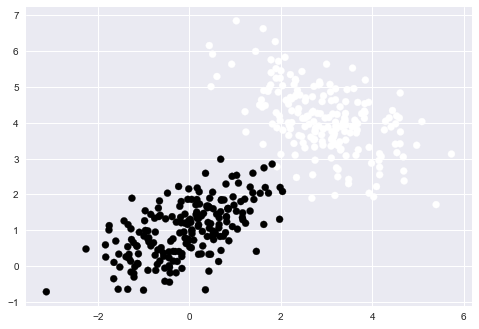

In [20]:
plt.style.use('seaborn')
##First let's plot these points and see, how do they look on the map
plt.scatter(X[:,0],X[:,1],c = Y) ##It will colour the points accordingly
plt.show()
#Clearly either each point belongs to class 0(white dot) or class 1(black dot)

In [71]:
#This function will calculate the distance between 2 vectors . Here each vector will be in the form of numpy array
def distance(X1,X2):
    #So X1-X2 will work like a matrix element wise subtraction , hence we can calculate the distance easily
    differenceArray = X1-X2
    #Now square each term in the numpy array
    SquareArray = differenceArray**2
    #Now get the the sum of all elements in the array
    mySum = np.sum(SquareArray)
    #Now Obviously the distance between X1 and X2 will be the sqrt of mySum
    return np.sqrt(mySum)

<img src="distanceFunction.png">

In [81]:
def knn(X,Y,querypoint,k=5):
    
    vals = [] ##This will store the distance of each point from the query point along with the class it belongs too
    
    
    totalTuples = X.shape[0]
    for i in range(totalTuples):
        
        #Finding distance of query point from current X[i]
        d = distance(X[i],querypoint)
        #Class to this current point(X[i]) belongs too
        class_of_current_coordinate_x = Y[i]
        
        vals.append([d,class_of_current_coordinate_x])
        
    
    ##It will sort the values on the basis of 0th column index which is actually the distance from the query_point
    vals = sorted(vals)
    #Taking out First k elements(i.e K nearest neighbours)
    vals = vals[:k]
    vals = np.array(vals)


    
    # First find , how many unique neigbours of this current vertex exists among the k nearest neigbours.
    #This is necessary because for now we know, we have only 2 classes. But in tough situation we can have more
    #than 2 class (e.g like 10 classes or more)
    unique_classes = np.unique(vals[:,1],return_counts = True) 
    #As we have made the return_counts = True, Therefore It will return the count of each unique class occurance 
    
    print(unique_classes)
    
    #Now we need to find which class frequency is maximum. For that we can use argmax, which find the element with
    #maximum value in numpy array/Matrix and return its index
    index = unique_classes[1].argmax()
    maximum_class_frequency_neighbour = unique_classes[0][index]
    
    return maximum_class_frequency_neighbour
    

        

<img src="valsDescription.png">

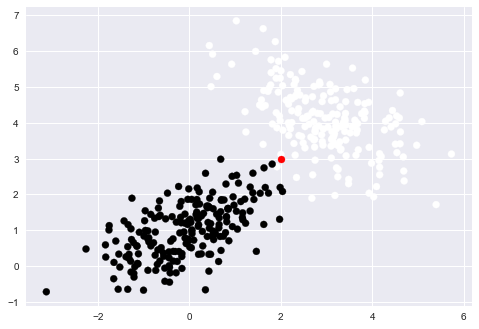

(array([0., 1.]), array([3, 2]))
0.0


In [88]:
##Let point which is to be analysed whether it belongs to class 1 or class 2 be [2,2]
query_x = np.array([2,3])
plt.scatter(X[:,0],X[:,1],c = Y) ##It will colour the points accordingly
plt.scatter(query_x[0],query_x[1],color = 'red')
plt.show()

ans = knn(X,Y,query_x,5)
print(ans) # Therefore (2,3) belongs more class white i.e class 0 --> Since more neigbours are of that class

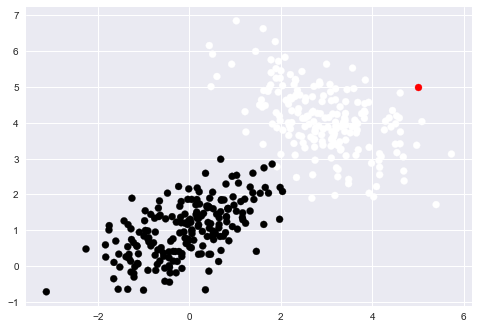

(array([0.]), array([5]))
0.0


In [87]:
query_x = np.array([5,5])
plt.scatter(X[:,0],X[:,1],c = Y) 
plt.scatter(query_x[0],query_x[1],color = 'red')
plt.show()

ans = knn(X,Y,query_x,5)
print(ans) #  (5,5) belongs clearly belongs to class white i.e class 0

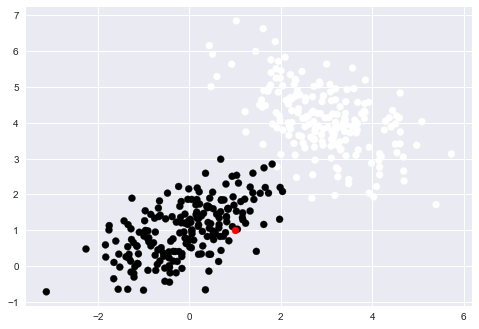

(array([1.]), array([5]))
1.0


In [86]:
query_x = np.array([1,1])
plt.scatter(X[:,0],X[:,1],c = Y) 
plt.scatter(query_x[0],query_x[1],color = 'red')
plt.show()

ans = knn(X,Y,query_x,5)
print(ans) #  (1,1) belongs clearly belongs to class black i.e class 1